[![Labellerr](https://storage.googleapis.com/labellerr-cdn/%200%20Labellerr%20template/notebook.webp)](https://www.labellerr.com)

# **Using-YOLO-For-Finding-Athlete-Speed**

---

[![labellerr](https://img.shields.io/badge/Labellerr-BLOG-black.svg)](https://www.labellerr.com/blog/<BLOG_NAME>)
[![Youtube](https://img.shields.io/badge/Labellerr-YouTube-b31b1b.svg)](https://www.youtube.com/@Labellerr)
[![Github](https://img.shields.io/badge/Labellerr-GitHub-green.svg)](https://github.com/Labellerr/Hands-On-Learning-in-Computer-Vision)
[![Scientific Paper](https://img.shields.io/badge/Official-Paper-blue.svg)](<PAPER LINK>)

## **Convert COCO Annotations to YOLO Format**
Transform annotated dataset from COCO JSON format to YOLO's required format with normalized bounding box coordinates. This prepares the data for model training.

In [3]:
from yolo_finetune_utils.coco_yolo_converter.bbox_converter import coco_to_yolo_converter

coco_to_yolo_converter(json_path="annotations.json", 
                       images_dir="dataset",
                       output_dir="yolo_format")

Loading COCO dataset from annotations.json
Found 20 images and 60 annotations
Categories mapping:
  COCO ID 0 (Ball) -> YOLO class 0
  COCO ID 1 (Tennis Player) -> YOLO class 1
Images with annotations: 20

Processing all split...

Conversion completed:
  Successfully processed: 20 images
  Failed to find: 0 images
  Total annotations converted: 60
  Categories: 2

YOLO dataset created at: yolo_format
Dataset configuration: yolo_format\dataset.yaml


{'output_path': 'yolo_format',
 'yaml_path': 'yolo_format\\dataset.yaml',
 'stats': {'total_images': 20,
  'images_with_annotations': 20,
  'successful_copies': 20,
  'failed_copies': 0,
  'total_annotations': 60,
  'categories': 2,
  'category_mapping': {0: 0, 1: 1},
  'class_names': {0: 'Ball', 1: 'Tennis Player'}}}

## **Import Required Libraries**
Import YOLO, OpenCV, Matplotlib, and NumPy for model training, video processing, and visualization.

In [7]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np

## **Train YOLO Model**
Fine-tune YOLOv11x model on the converted dataset for 300 epochs with batch size 20 and 640x640 image resolution. The model learns to detect athletes in videos.

In [ ]:
!yolo task=detect mode=train data="yolo_format\dataset.yaml" model="yolo11x.pt" epochs=300 imgsz=640 batch=20

New https://pypi.org/project/ultralytics/8.3.191 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.170  Python-3.10.18 torch-2.7.1+cpu CPU (AMD Ryzen 5 5500U with Radeon Graphics)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=20, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=yolo_format\dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=300, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11x.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, opti


  0%|          | 0.00/109M [00:00<?, ?B/s]
  0%|          | 128k/109M [00:00<01:38, 1.17MB/s]
  0%|          | 512k/109M [00:00<00:43, 2.62MB/s]
  1%|▏         | 1.50M/109M [00:00<00:19, 5.94MB/s]
  3%|▎         | 3.00M/109M [00:00<00:12, 9.23MB/s]
  4%|▍         | 4.75M/109M [00:00<00:08, 12.2MB/s]
  6%|▌         | 6.62M/109M [00:00<00:07, 14.5MB/s]
  7%|▋         | 8.12M/109M [00:00<00:07, 14.2MB/s]
  9%|▉         | 9.88M/109M [00:00<00:06, 15.3MB/s]
 11%|█         | 11.6M/109M [00:00<00:06, 15.9MB/s]
 12%|█▏        | 13.2M/109M [00:01<00:06, 15.7MB/s]
 14%|█▍        | 15.1M/109M [00:01<00:05, 16.6MB/s]
 16%|█▌        | 17.0M/109M [00:01<00:05, 17.2MB/s]
 17%|█▋        | 19.0M/109M [00:01<00:05, 18.2MB/s]
 19%|█▉        | 20.9M/109M [00:01<00:05, 18.4MB/s]
 21%|██        | 22.8M/109M [00:01<00:04, 18.7MB/s]
 23%|██▎       | 24.8M/109M [00:01<00:04, 19.1MB/s]
 25%|██▍       | 26.9M/109M [00:01<00:04, 19.8MB/s]
 27%|██▋       | 29.0M/109M [00:01<00:04, 20.4MB/s]
 28%|██▊       | 31.0M

## **Model Inference**
Load video file for speed tracking and detection inference using the trained YOLO model.

In [5]:
video_path = r"Assests\tennis_clip_cut.mp4"

### **Load and Display Video Frame**
Read video file, extract a sample frame at frame 50, display it, and print video properties (FPS and total frames).

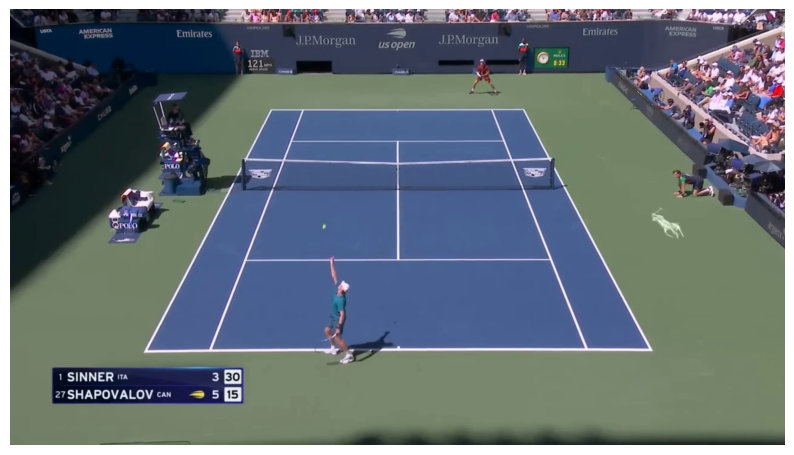

30
303


In [8]:
cap = cv2.VideoCapture(video_path)

if cap.isOpened() == False:
    print("Error opening video stream or file")
    
fps = int(cap.get(cv2.CAP_PROP_FPS))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

cap.set(cv2.CAP_PROP_POS_FRAMES, 50)
ret, frame = cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
cap.release()

plt.figure(figsize=(10, 6))
plt.imshow(frame)
plt.imsave('frame.png', frame)
plt.axis('off')
plt.show()

print(fps)
print(total_frames)

### **Test Model Inference**
Run YOLO tracking on a sample frame to verify model works and visualize detected athletes with bounding boxes.


0: 384x640 2 Tennis Players, 1057.5ms
Speed: 15.1ms preprocess, 1057.5ms inference, 12.5ms postprocess per image at shape (1, 3, 384, 640)


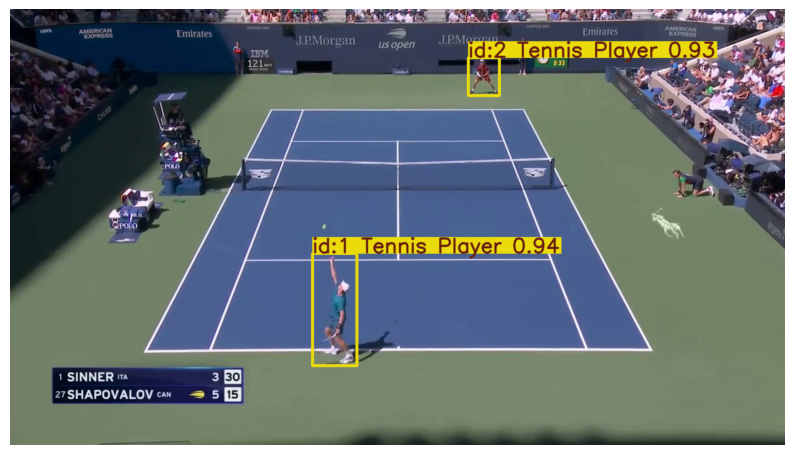

In [9]:
model = YOLO('runs/detect/train/weights/last.pt')

result = model.track(source=frame, conf=0.1)

plt.figure(figsize=(10, 6))
plt.axis('off')
plt.imshow(result[0].plot())

### **Interactive Court Corner Selection**
Interactively click on video frame to select tennis court corners (4 points) for perspective transformation and calibration. These corners define the court boundaries for accurate speed calculation.

In [10]:
# Mouse callback function
coordinates = []

def get_pixel_coordinates(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:  # left mouse click
        # print(f"Coordinates: (x={x}, y={y})")
        coordinates.append((x, y))
        cv2.circle(frame, (x, y), 5, (0, 0, 255), -1)

# Load video
cap = cv2.VideoCapture(video_path)
cap.set(cv2.CAP_PROP_POS_FRAMES, 30)  # Set to desired frame
ret, frame = cap.read()
if not ret:
    print("Failed to read video frame")
    cap.release()
    exit()

cv2.namedWindow("Frame", cv2.WINDOW_GUI_EXPANDED)
cv2.setMouseCallback("Frame", get_pixel_coordinates)

while True:
    cv2.imshow("Frame", frame)

    key = cv2.waitKey(1) & 0xFF
    if key == 27:  # Press ESC to exit
        break

cap.release()
cv2.destroyAllWindows()

print(coordinates)

[(649, 250), (1273, 248), (1588, 844), (336, 846)]


### **Visualize Court Boundaries**
Display the tennis court outline and net area as colored polygons overlaid on the video frame. Green represents the net area, blue represents the court boundaries.

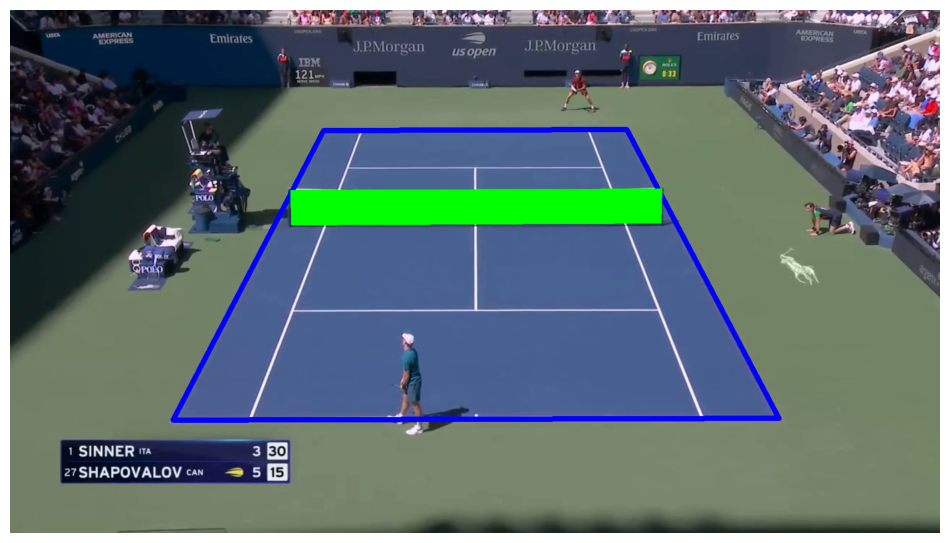

In [13]:
plane_coordinates = [(647, 250), (1273, 248), (1587, 843), (336, 847)]
net_coordinates = [(580, 445), (579, 373), (1346, 370), (1344, 441)]

ground_outline = frame.copy()

pts1 = np.array(plane_coordinates, np.int32)
pts1 = pts1.reshape((-1, 1, 2))

pts2 = np.array(net_coordinates, np.int32)
pts2 = pts2.reshape((-1, 1, 2))

cv2.polylines(ground_outline, [pts1], isClosed=True, color=(255, 0, 0), thickness=10)
# cv2.fillPoly(frame, [pts1], color=(255, 255, 255))
cv2.fillPoly(ground_outline, [pts2], color=(0, 255, 0))

frame_rgb = cv2.cvtColor(ground_outline, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 8))
plt.axis('off')
plt.imshow(frame_rgb)

## **Setup Speed Tracking System**
Initialize core libraries and constants for real-time athlete speed tracking including YOLO model, court dimensions (23.77m length, 10.97m width), and corner coordinates.

In [16]:
import cv2
import numpy as np
from ultralytics import YOLO
from collections import deque
import time

# Tennis court constants
COURT_LENGTH_M = 23.77  # meters
COURT_WIDTH_M = 10.97   # meters
CORNER = [(647, 250), (1273, 248), (1587, 843), (336, 847)]

print("✓ Essential libraries loaded")


✓ Essential libraries loaded


In [17]:
class RealTimeSpeedTracker:
    """Simplified real-time tennis player speed tracker"""
    
    def __init__(self, model_path, fps=30):
        self.model = YOLO(model_path)
        self.fps = fps
        
        # Tracking data (keep only last 10 positions for speed calculation)
        self.positions = {}  # track_id: deque of (x, y, time)
        self.current_speeds = {}  # track_id: current_speed_kmh
        
        # Court calibration
        self.pixel_to_meter_ratio = None
        self.perspective_matrix = None
        
        print(f"✓ Speed tracker initialized with model: {model_path}")
    
    def set_court_calibration(self, corners):
        """Set 4 court corners for perspective transformation"""
        corners = np.array(corners, dtype=np.float32)
        
        # Calculate pixel-to-meter ratio
        top_width = np.linalg.norm(corners[1] - corners[0])
        bottom_width = np.linalg.norm(corners[2] - corners[3])
        left_height = np.linalg.norm(corners[3] - corners[0])
        right_height = np.linalg.norm(corners[2] - corners[1])
        
        avg_width_pixels = (top_width + bottom_width) / 2
        avg_height_pixels = (left_height + right_height) / 2
        
        width_ratio = COURT_WIDTH_M / avg_width_pixels
        height_ratio = COURT_LENGTH_M / avg_height_pixels
        self.pixel_to_meter_ratio = (width_ratio + height_ratio) / 2
        
        # Perspective transformation
        dst_corners = np.array([[0, 0], [600, 0], [600, 150], [0, 150]], dtype=np.float32)
        self.perspective_matrix = cv2.getPerspectiveTransform(corners, dst_corners)
        
        print(f"✓ Court calibrated - Ratio: {self.pixel_to_meter_ratio:.6f} m/pixel")
    
    def apply_perspective_correction(self, point):
        """Apply perspective correction to point"""
        if self.perspective_matrix is not None:
            point_array = np.array([[[point[0], point[1]]]], dtype=np.float32)
            corrected = cv2.perspectiveTransform(point_array, self.perspective_matrix)
            return tuple(corrected[0][0])
        return point
    
    def calculate_speed(self, track_id, position, current_time):
        """Calculate current speed for track_id"""
        if track_id not in self.positions:
            self.positions[track_id] = deque(maxlen=10)
        
        # Apply perspective correction
        corrected_pos = self.apply_perspective_correction(position)
        
        # Store position with timestamp
        self.positions[track_id].append((corrected_pos[0], corrected_pos[1], current_time))
        
        # Need at least 2 points for speed
        if len(self.positions[track_id]) < 2:
            self.current_speeds[track_id] = 0.0
            return 0.0
        
        # Calculate speed using last 5 points for smoothing
        positions = list(self.positions[track_id])
        if len(positions) >= 5:
            old_pos = positions[-5]
            new_pos = positions[-1]
        else:
            old_pos = positions[-2]
            new_pos = positions[-1]
        
        # Calculate distance and time
        dx = new_pos[0] - old_pos[0]
        dy = new_pos[1] - old_pos[1]
        distance_pixels = np.sqrt(dx*dx + dy*dy)
        time_diff = new_pos[2] - old_pos[2]
        
        if time_diff > 0 and self.pixel_to_meter_ratio:
            distance_meters = distance_pixels * self.pixel_to_meter_ratio
            speed_ms = distance_meters / time_diff
            speed_kmh = speed_ms * 3.6
            
            # Filter unrealistic speeds (>50 km/h)
            if speed_kmh > 50:
                speed_kmh = 0.0
                
            self.current_speeds[track_id] = speed_kmh
            return speed_kmh
        
        self.current_speeds[track_id] = 0.0
        return 0.0
    
    
    def process_frame(self, frame):
        """Process frame and return annotated frame with speeds - top 2 players only"""
        current_time = time.time()
        
        # YOLO tracking
        results = self.model.track(frame, persist=True, conf=0.3, verbose=False, classes=[1])
        
        # Start with original frame for custom annotation
        annotated_frame = frame.copy()
        
        # Get detections and select top 2
        if results[0].boxes is not None and results[0].boxes.id is not None:
            boxes = results[0].boxes.xywh.cpu().numpy()
            track_ids = results[0].boxes.id.int().cpu().tolist()
            confidences = results[0].boxes.conf.float().cpu().tolist()
            
            # Combine detections and sort by confidence (highest first)
            detections = list(zip(boxes, track_ids, confidences))
            detections_sorted = sorted(detections, key=lambda x: x[2], reverse=True)
            
            # Take only top 2 detections
            top_detections = detections_sorted[:2]
            
            # Process and annotate top 2 players
            for box, track_id, conf in top_detections:
                x, y, w, h = box
                
                # Calculate speed for this player
                speed = self.calculate_speed(track_id, (x, y), current_time)
                
                # Draw custom bounding box
                top_left = (int(x - w/2), int(y - h/2))
                bottom_right = (int(x + w/2), int(y + h/2))
                
                # Draw green bounding box
                cv2.rectangle(annotated_frame, top_left, bottom_right, (0, 255, 0), 3)
                
                # Create label with ID and speed
                label = f"Player {track_id}: {speed:.1f} km/h"
                
                # Add background rectangle for text
                text_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)[0]
                text_bg_top_left = (top_left[0], max(top_left[1] - 35, 5))
                text_bg_bottom_right = (top_left[0] + text_size[0] + 10, text_bg_top_left[1] + 25)
                
                cv2.rectangle(annotated_frame, text_bg_top_left, text_bg_bottom_right, (0, 0, 0), -1)
                
                # Add text label above bounding box
                cv2.putText(annotated_frame, label, 
                        (top_left[0] + 5, max(top_left[1] - 10, 20)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
                
                # Add confidence score (optional)
                conf_text = f"Conf: {conf:.2f}"
                cv2.putText(annotated_frame, conf_text,
                        (top_left[0] + 5, bottom_right[1] + 20),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
        
        # Add speed display in top-right corner
        self.draw_speed_display(annotated_frame)
    
        return annotated_frame

                
            
    def draw_speed_display(self, frame):
        """Draw speed information in top-right corner"""
        h, w = frame.shape[:2]

        # Doubled size dimensions
        box_width = 350
        box_height = 160
        padding = 10

        start_x = w - box_width - padding
        start_y = padding
        end_x = w - padding
        end_y = start_y + box_height

        # Background rectangle for speed display
        cv2.rectangle(frame, (start_x, start_y), (end_x, end_y), (0, 0, 0), -1)
        cv2.rectangle(frame, (start_x, start_y), (end_x, end_y), (255, 255, 255), 2)

        # Title
        cv2.putText(frame, "PLAYER SPEEDS", (start_x + 10, start_y + 35), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 255, 255), 3)

        # Display speeds for each tracked player
        y_offset = start_y + 70
        if self.current_speeds:
            for track_id, speed in self.current_speeds.items():
                speed_text = f"Player {track_id}: {speed:.1f} km/h"
                cv2.putText(frame, speed_text, (start_x + 10, y_offset), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 3)
                y_offset += 45  # Increased spacing between lines
        else:
            cv2.putText(frame, "No players detected", (start_x + 10, y_offset), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 3)

print("✓ Streamlined speed tracker loaded")

✓ Streamlined speed tracker loaded


### **Real-Time Speed Tracker Class**
Implement RealTimeSpeedTracker class that performs YOLO-based tracking, applies perspective correction using court calibration, calculates athlete speeds in km/h, and handles trajectory smoothing. Displays top 2 detected athletes with their speeds.

In [18]:
def run_realtime_speed_tracking(video_path, model_path, output_path=None, show_calibration=True):
    """Run real-time speed tracking on video and save annotated output"""
    
    # Initialize tracker
    tracker = RealTimeSpeedTracker(model_path)
    
    # Open video
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error: Cannot open video {video_path}")
        return
    
    # Get video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    tracker.fps = fps
    
    # Set output path if not provided
    if output_path is None:
        import os
        base_name = os.path.splitext(os.path.basename(video_path))[0]
        output_path = f"{base_name}_speed_tracking.mp4"
    
    # Initialize video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
    if not out.isOpened():
        print(f"Error: Cannot create output video {output_path}")
        return
    
    print(f"📹 Input: {video_path}")
    print(f"💾 Output: {output_path}")
    print(f"📊 Video properties: {width}x{height} @ {fps:.2f} FPS ({total_frames} frames)")
    
    # Court calibration
    if show_calibration:
        ret, first_frame = cap.read()
        if ret:
            corners = CORNER
            if len(corners) == 4:
                tracker.set_court_calibration(corners)
            else:
                print("⚠️ Skipping calibration - speeds will be in pixel units")
        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)  # Reset to beginning
    
    # Process video
    print("🎬 Processing video...")
    
    frame_count = 0
    
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            
            # Process frame
            annotated_frame = tracker.process_frame(frame)
            
            # Write frame to output video
            out.write(annotated_frame)
            
            frame_count += 1
            
            # Progress indicator
            if frame_count % 30 == 0:  # Every 30 frames
                progress = (frame_count / total_frames) * 100
                print(f"Progress: {frame_count}/{total_frames} frames ({progress:.1f}%)")
    
    except KeyboardInterrupt:
        print("\n⏹️ Processing interrupted by user")
    
    finally:
        # Clean up
        cap.release()
        out.release()
        cv2.destroyAllWindows()
    
    print(f"✅ Processing complete!")
    print(f"📁 Annotated video saved: {output_path}")
    print(f"📊 Processed {frame_count} frames")
    
    return output_path


### **Video Processing Pipeline**
Main function that processes entire video frame-by-frame using the speed tracker. Applies YOLO detection, calculates speeds, and saves annotated output video with speed overlays and progress indicators.

In [19]:
# 🔧 CONFIGURATION
VIDEO_PATH = video_path
MODEL_PATH = r".\runs\detect\train\weights\last.pt"

run_realtime_speed_tracking(
    video_path=VIDEO_PATH,
    model_path=MODEL_PATH,
    show_calibration=True  # Set False to skip calibration
)

✓ Speed tracker initialized with model: .\runs\detect\train\weights\last.pt
📹 Input: Assests\tennis_clip_cut.mp4
💾 Output: tennis_clip_cut_speed_tracking.mp4
📊 Video properties: 1920x1080 @ 30.10 FPS (303 frames)
✓ Court calibrated - Ratio: 0.023505 m/pixel
🎬 Processing video...
Progress: 30/303 frames (9.9%)
Progress: 60/303 frames (19.8%)
Progress: 90/303 frames (29.7%)
Progress: 120/303 frames (39.6%)
Progress: 150/303 frames (49.5%)
Progress: 180/303 frames (59.4%)
Progress: 210/303 frames (69.3%)
Progress: 240/303 frames (79.2%)
Progress: 270/303 frames (89.1%)
Progress: 300/303 frames (99.0%)
✅ Processing complete!
📁 Annotated video saved: tennis_clip_cut_speed_tracking.mp4
📊 Processed 303 frames


'tennis_clip_cut_speed_tracking.mp4'

---

## 👨‍💻 About Labellerr's Hands-On Learning in Computer Vision

Thank you for exploring this **Labellerr Hands-On Computer Vision Cookbook**! We hope this notebook helped you learn, prototype, and accelerate your vision projects.  
Labellerr provides ready-to-run Jupyter/Colab notebooks for the latest models and real-world use cases in computer vision, AI agents, and data annotation.

---
## 🧑‍🔬 Check Our Popular Youtube Videos

Whether you're a beginner or a practitioner, our hands-on training videos are perfect for learning custom model building, computer vision techniques, and applied AI:

- [How to Fine-Tune YOLO on Custom Dataset](https://www.youtube.com/watch?v=pBLWOe01QXU)  
  Step-by-step guide to fine-tuning YOLO for real-world use—environment setup, annotation, training, validation, and inference.
- [Build a Real-Time Intrusion Detection System with YOLO](https://www.youtube.com/watch?v=kwQeokYDVcE)  
  Create an AI-powered system to detect intruders in real time using YOLO and computer vision.
- [Finding Athlete Speed Using YOLO](https://www.youtube.com/watch?v=txW0CQe_pw0)  
  Estimate real-time speed of athletes for sports analytics.
- [Object Counting Using AI](https://www.youtube.com/watch?v=smsjBBQcIUQ)  
  Learn dataset curation, annotation, and training for robust object counting AI applications.
---

## 🎦 Popular Labellerr YouTube Videos

Level up your skills and see video walkthroughs of these tools and notebooks on the  
[Labellerr YouTube Channel](https://www.youtube.com/@Labellerr/videos):

- [How I Fixed My Biggest Annotation Nightmare with Labellerr](https://www.youtube.com/watch?v=hlcFdiuz_HI) – Solving complex annotation for ML engineers.
- [Explore Your Dataset with Labellerr's AI](https://www.youtube.com/watch?v=LdbRXYWVyN0) – Auto-tagging, object counting, image descriptions, and dataset exploration.
- [Boost AI Image Annotation 10X with Labellerr's CLIP Mode](https://www.youtube.com/watch?v=pY_o4EvYMz8) – Refine annotations with precision using CLIP mode.
- [Boost Data Annotation Accuracy and Efficiency with Active Learning](https://www.youtube.com/watch?v=lAYu-ewIhTE) – Speed up your annotation workflow using Active Learning.

> 👉 **Subscribe** for Labellerr's deep learning, annotation, and AI tutorials, or watch videos directly alongside notebooks!

---

## 🤝 Stay Connected

- **Website:** [https://www.labellerr.com/](https://www.labellerr.com/)
- **Blog:** [https://www.labellerr.com/blog/](https://www.labellerr.com/blog/)
- **GitHub:** [Labellerr/Hands-On-Learning-in-Computer-Vision](https://github.com/Labellerr/Hands-On-Learning-in-Computer-Vision)
- **LinkedIn:** [Labellerr](https://in.linkedin.com/company/labellerr)
- **Twitter/X:** [@Labellerr1](https://x.com/Labellerr1)

*Happy learning and building with Labellerr!*
